<a href="https://colab.research.google.com/github/Harshi07-c/SPOTIFY-LIKE-OR-DISLIKE/blob/main/MODEL_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [41]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#LOAD DATA

In [3]:
df = pd.read_csv("/content/cleaned_data.csv")
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,target,artist
0,0.01020,0.833,204600,0.434,0.021900,-8.795,0.4310,150.062,0.286,1,0.562251
1,0.19900,0.743,326933,0.359,0.006110,-10.401,0.0794,160.083,0.588,1,0.575818
2,0.03440,0.838,185707,0.412,0.000234,-7.148,0.2890,75.044,0.173,1,0.562251
3,0.60400,0.494,199413,0.338,0.510000,-15.236,0.0261,86.468,0.230,1,0.603482
4,0.18000,0.678,392893,0.561,0.512000,-11.648,0.0694,174.004,0.904,1,0.570014
5,0.00479,0.804,251333,0.560,0.000000,-6.682,0.1850,85.023,0.264,1,0.628824
6,0.01450,0.739,241400,0.472,0.000007,-11.204,0.1560,80.030,0.308,1,0.628824
7,0.02020,0.266,349667,0.348,0.664000,-11.609,0.0371,144.154,0.393,1,0.570014
8,0.04810,0.603,202853,0.944,0.000000,-3.626,0.3470,130.035,0.398,1,0.570014
9,0.00208,0.836,226840,0.603,0.000000,-7.792,0.2370,99.994,0.386,1,0.570014


#STANDARDIZATION

In [6]:
from sklearn.preprocessing import StandardScaler

In [4]:
y = df['target']
X = df.drop('target', axis=1)
numeric_col = X.select_dtypes(include='number').columns

In [7]:
#Created a function to standardize all numeric columns in a dataframe
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [8]:
#Passing the dataframe and the numeric colums as parameters to the standardization function which standardizes all numeric values in a dataframe
df_standardized = standardization(X,numeric_col)
df_standardized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,artist
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.454530,3.763084,1.066709,-0.853039,0.742346
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.881573,-0.147529,1.442323,0.368970,0.923398
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.016586,2.183712,-1.745166,-1.310280,0.742346
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-2.167220,-0.740350,-1.316964,-1.079636,1.292550
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-1.213155,-0.258753,1.964120,1.647627,0.845943


#SPLITTING THE DATA

In [42]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#BUILDING A SEQUENTIAL MODEL USING KERAS

In [50]:
model = Sequential()
model.add(Dense(units = 12,input_shape=(10,), activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1,activation = "sigmoid"))

For the first two layers , activation function is ReLU , because it helps in overcoming gradient descent.

For the output layer , activation function is sigmoid because , we need the output between 0 and 1.


#COMPILATION OF MODEL

In [51]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

Here since it's binary classification problem , the loss function is binary_crossentropy.

#FIT KERAS MODEL

In [ ]:
#model.fit(X, y, epochs=150, batch_size=10)

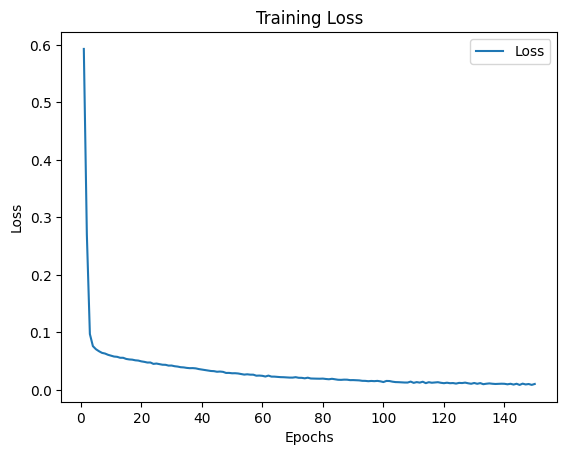

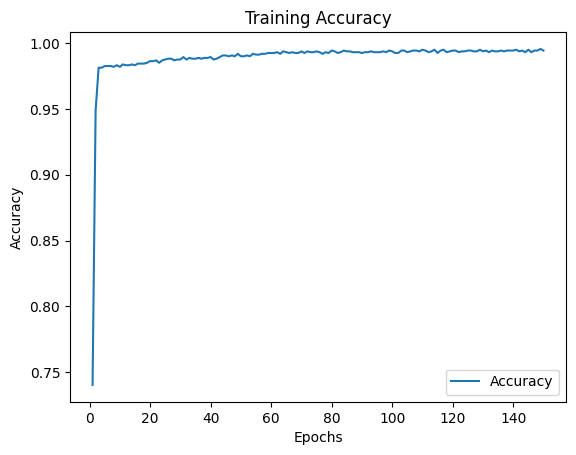

In [52]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose = 0)

# Access the loss and accuracy values from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create a list of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the loss
plt.plot(epochs, loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(epochs, accuracy, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()




INSIGHT :

1.Training Loss decreases as the number of epochs increases, with a sharp drop in the loss after almost 10 epochs.

2.Accuracy increases as the number of epochs increases with a sharp increase after 10 epochs.

#EVALUATION OF MODEL



In [53]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

51/51 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9957
Accuracy: 99.57


#PREDICTION USING THE MODEL

In [54]:
# Make class predictions with the model
predictions = model.predict(X_test)



13/13 [==============================] - 0s 2ms/step


#PLOTTING PREDICTION VS TRUE VALUES

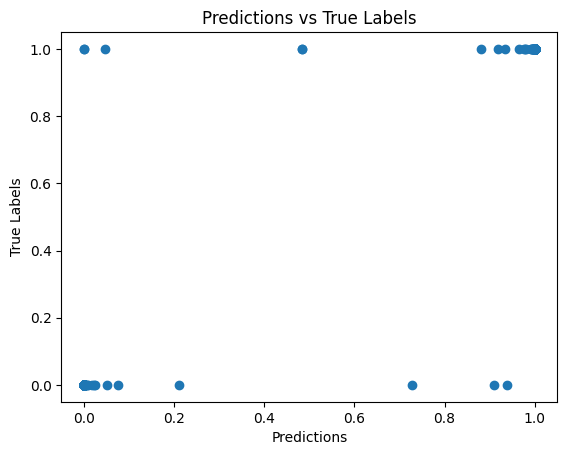

In [55]:
import matplotlib.pyplot as plt
# Convert predictions and true labels to 1D arrays
predictions = predictions.flatten()
y = np.array(y_test)

# Plot the predictions versus true labels
plt.scatter(predictions, y)
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Predictions vs True Labels')
plt.show()

Insight :  

Model is performing good in most of the cases with a very few number of false positive and false negative.